In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [19]:
# importing the dataset
ABNB="https://raw.githubusercontent.com/ukantjadia/30-days-of-Mahcine-Learning/Main/DAY-01/ABNB.csv"
df = pd.read_csv(ABNB)

In [3]:
# Summary Stats

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,454.000000,454.000000,454.000000,454.000000,454.000000,4.540000e+02
mean,152.735925,156.465595,148.969855,152.729185,152.729185,6.690328e+06
std,28.340932,29.107813,27.490223,28.226659,28.226659,4.417387e+06
min,88.879997,91.459999,86.709999,89.080002,89.080002,1.995400e+06
25%,136.821507,139.842495,132.920002,135.955002,135.955002,4.114375e+06
50%,154.932495,159.099998,151.230004,155.654999,155.654999,5.450000e+06
75%,172.556507,175.974998,168.595005,171.744996,171.744996,7.631375e+06
max,216.240005,219.940002,209.089996,216.839996,216.839996,3.975500e+07


In [4]:
import plotly.graph_objs as go
fig = go.Figure([go.Ohlc(x=df['Date'],
                         open=df['Open'],
                         high=df['High'],
                         low=df['Low'],
                         close=df['Close'])])
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()



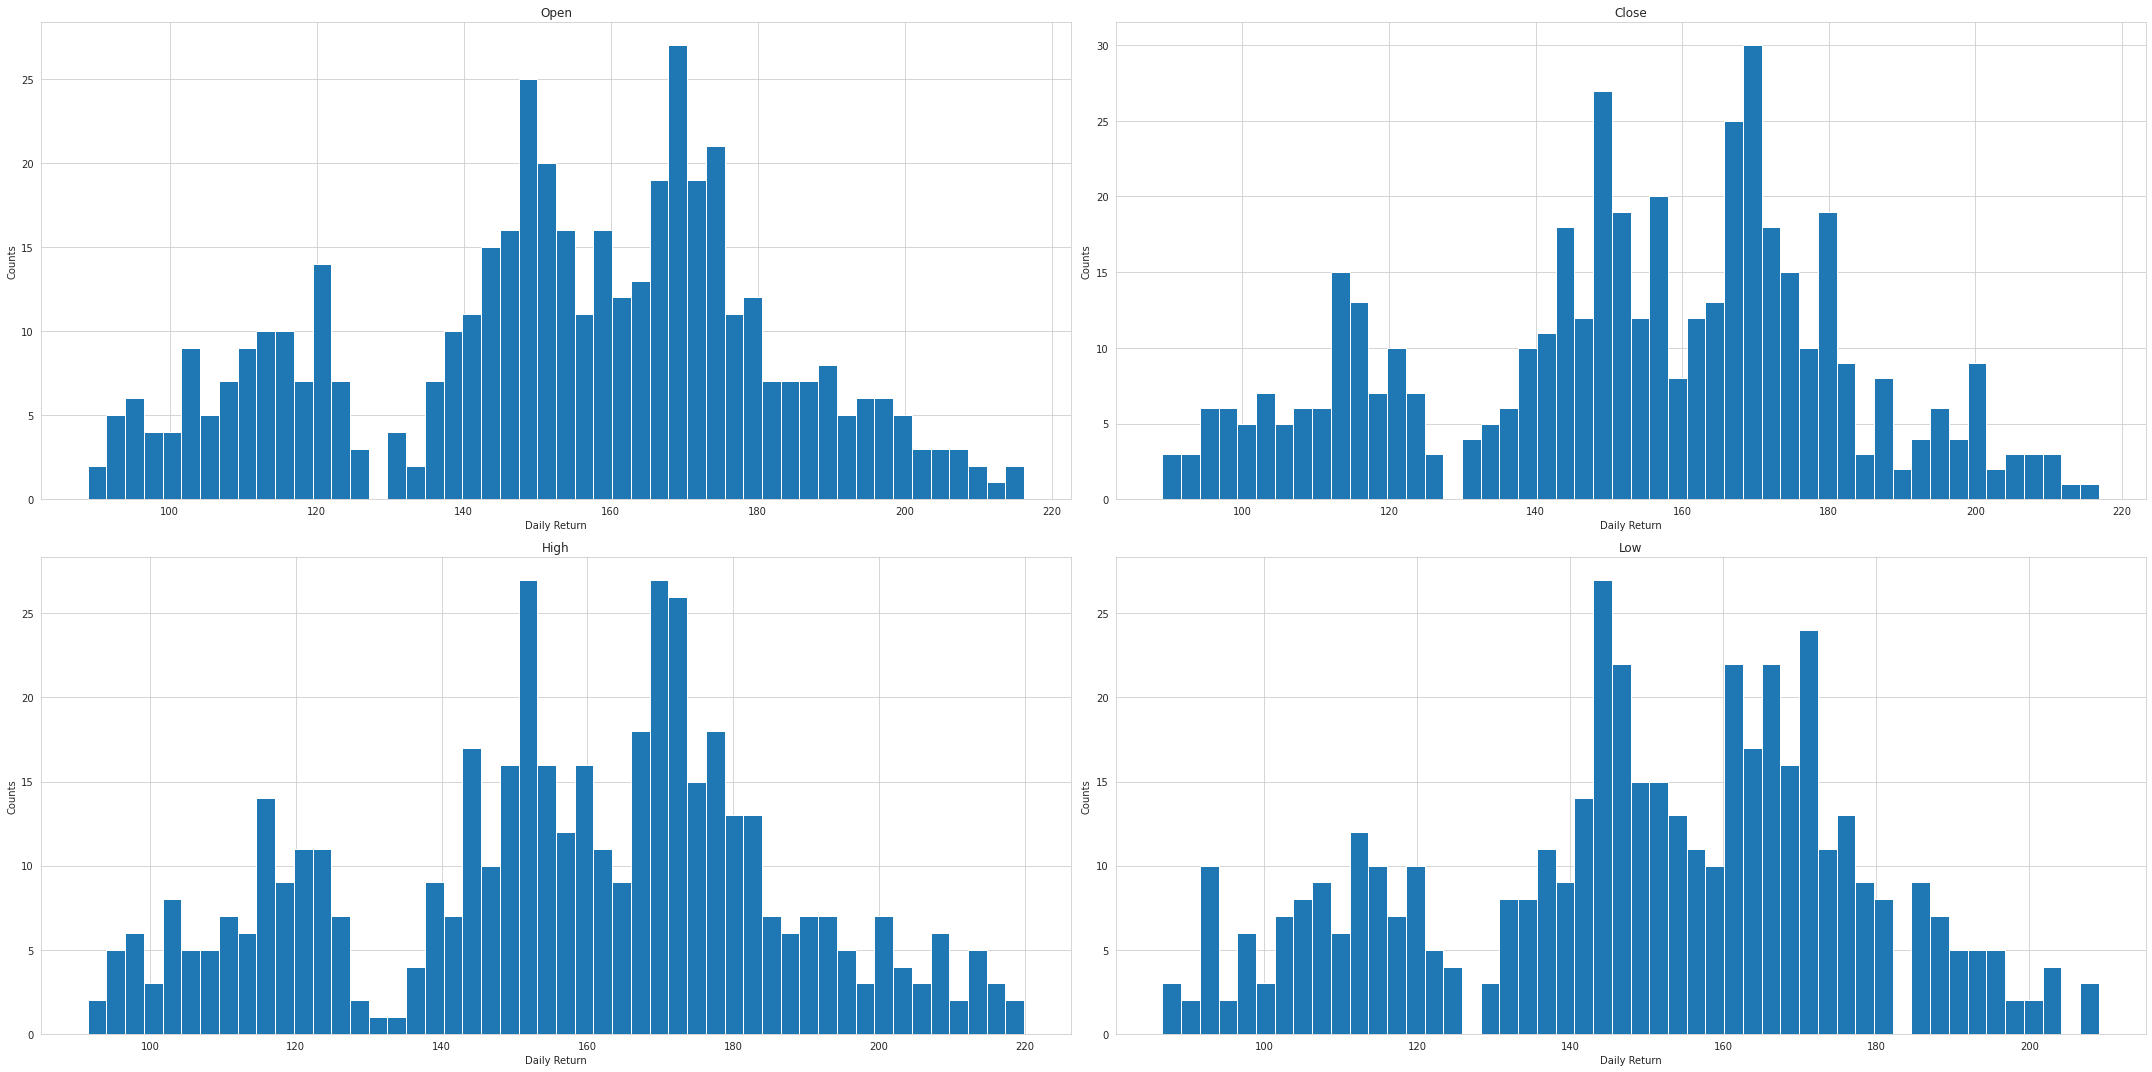

In [20]:
plt.figure(figsize=(30,15));
dff = ['Open','Close','High','Low']
for no,col in enumerate(dff,1):
  plt.subplot(2,2,no)
  df[str(col)].hist(bins=50)
  plt.xlabel('Daily Return')
  plt.ylabel('Counts')
  plt.title(f'{col}')
 
plt.tight_layout()

In [6]:
# Creating the dataframe of date formate and setting it to index
df['Date'] = pd.to_datetime(df['Date'])
df2 = df.set_index('Date')
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


In [7]:
def create_features_datetime(df):
    df['Year']=df.index.year
    df['Month']=df.index.month
    df['dow']=df.index.day_of_week
    
    return df
df_tr=create_features_datetime(df2)
df_tr.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,dow
Date,,,,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,2020,12,4
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,2020,12,0
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,2020,12,1
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,2020,12,2
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,2020,12,3


In [8]:
X = df_tr.drop('Close',axis=1)
y = df_tr['Close']
print(X)

                  Open        High         Low   Adj Close    Volume  Year  \
Date                                                                         
2020-12-11  146.550003  151.500000  135.100006  139.250000  26980800  2020   
2020-12-14  135.000000  135.300003  125.160004  130.000000  16966100  2020   
2020-12-15  126.690002  127.599998  121.500000  124.800003  10914400  2020   
2020-12-16  125.830002  142.000000  124.910004  137.990005  20409600  2020   
2020-12-17  143.000000  152.449997  142.669998  147.050003  15054700  2020   
...                ...         ...         ...         ...       ...   ...   
2022-09-26  101.779999  105.360001  101.559998  103.230003   5278800  2022   
2022-09-27  106.040001  108.169998  104.139999  106.370003   5081000  2022   
2022-09-28  106.700996  111.129997  105.779999  110.690002   4518200  2022   
2022-09-29  109.190002  109.474998  105.169998  106.660004   4259500  2022   
2022-09-30  104.760002  109.080002  104.730003  105.040001   474

In [9]:
# test size 20% and train size 80%

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test),np.array(y_test)
print(f"{y_test.shape} {X_test.shape}")

(91,) (91, 8)


In [10]:
# Importing and creating the DecisionTreemodel

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [11]:
pred=dtree.predict(X)
y_pred_prob_df = pd.DataFrame(data=pred, columns=['Close_predict'])
df['Close_predict'] = y_pred_prob_df
df

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names



,Date,Open,High,Low,Close,Adj Close,Volume,Close_predict
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,139.250000
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,131.589996
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,124.800003
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,137.990005
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,147.050003
...,...,...,...,...,...,...,...,...
449,2022-09-26,101.779999,105.360001,101.559998,103.230003,103.230003,5278800,103.230003
450,2022-09-27,106.040001,108.169998,104.139999,106.370003,106.370003,5081000,106.370003
451,2022-09-28,106.700996,111.129997,105.779999,110.690002,110.690002,4518200,110.690002
452,2022-09-29,109.190002,109.474998,105.169998,106.660004,106.660004,4259500,106.660004


# Decision Tree Regressor

In [12]:
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)
# accu = metrics.accuracy_score(y_test, y_pred)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))
# print('Accuracy score is {}'.format(accu*100))

MAE is 0.3470327142857169
MSE is 0.269499517831574
R2 score is 0.9996783892298543
RMSE score is 0.5191334296995079


# Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [14]:
from sklearn import metrics
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 0.29589454329670223
MSE is 0.2637844988276057
R2 score is 0.9996852093224394
RMSE score is 0.5135995510391396


# Visualize Random Forest Regressor

In [15]:
pred_rdt=rf.predict(X)
y_pred_prob_df_rdt = pd.DataFrame(data=pred_rdt, columns=['Close_predict'])
df['Close_predict'] = y_pred_prob_df_rdt
df

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



,Date,Open,High,Low,Close,Adj Close,Volume,Close_predict
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,139.164899
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,130.719802
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,125.152402
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,136.527903
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,146.952300
...,...,...,...,...,...,...,...,...
449,2022-09-26,101.779999,105.360001,101.559998,103.230003,103.230003,5278800,103.366302
450,2022-09-27,106.040001,108.169998,104.139999,106.370003,106.370003,5081000,106.500002
451,2022-09-28,106.700996,111.129997,105.779999,110.690002,110.690002,4518200,110.838201
452,2022-09-29,109.190002,109.474998,105.169998,106.660004,106.660004,4259500,106.787003


In [16]:
Date = df['Date']
Close = df['Close']
Close2 = df['Close_predict']

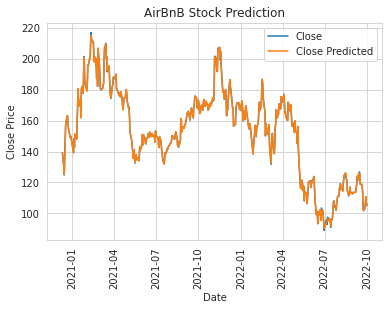

In [17]:
plt.plot (Date,Close, label='Close')
plt.plot (Date,Close2, label='Close Predicted')
plt.title ('AirBnB Stock Prediction')
plt.xlabel ('Date')
plt.ylabel ('Close Price')
plt.legend(loc = 'upper right')
plt.xticks(rotation=90)
plt.show()

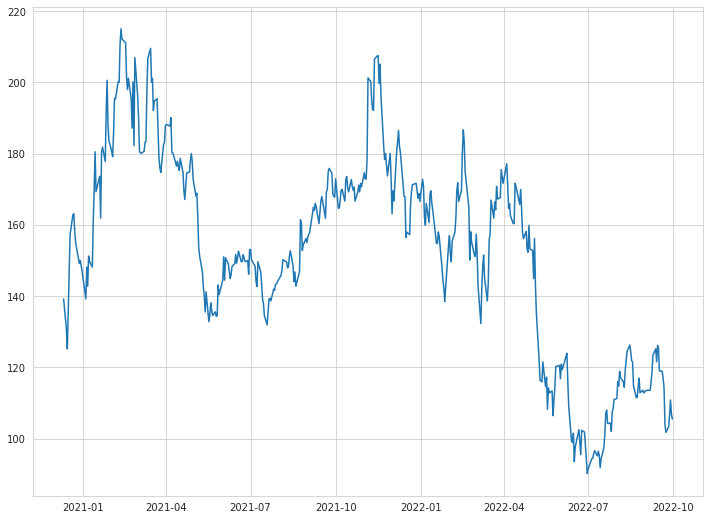

In [18]:
plt.figure(figsize=(12,9))
plt.subplot(1,1,1)
plt.plot(Date,Close2,label='Close Predicted')
